In [1]:
%%capture
#Install libraries
!pip install bs4==4.8.2;
!pip install pandas==1.0.1;
!pip install geopandas==0.8.1;
!pip install matplotlib==3.1.3;
!pip install folium==0.11.0;

In [2]:
#Import libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import os

In [68]:
name = []
company = []
location = []
subject = 'chef'
place = 'Canada'

In [69]:
web_pages = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, 0)
req = requests.get(web_pages)
soup = BeautifulSoup(req.text, "html.parser")

In [70]:
actual_page = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+1])
total_pages = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+3].replace(',',''))

In [71]:
total_pages

2942

In [72]:
soup

<!DOCTYPE html>

<html dir="ltr" lang="en">
<head>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<script id="polyfill-script-bundle">/* Disable minification (remove `.min` from URL path) for more info */

(function(self, undefined) {function ArrayCreate(r){if(1/r==-Infinity&&(r=0),r>Math.pow(2,32)-1)throw new RangeError("Invalid array length");var n=[];return n.length=r,n}function Call(t,l){var n=arguments.length>2?arguments[2]:[];if(!1===IsCallable(t))throw new TypeError(Object.prototype.toString.call(t)+"is not a function.");return t.apply(l,n)}function Get(n,t){return n[t]}function HasOwnProperty(r,t){return Object.prototype.hasOwnProperty.call(r,t)}function HasProperty(n,r){return r in n}function IsArray(r){return"[object Array]"===Object.prototype.toString.call(r)}function IsCallable(n){return"function"==typeof n}function RequireObjectCoercible(e){if(null===e||e===undefined)throw TypeError();return e}function SameValueNonNumber(e,n){return e===n}function ToBo

In [73]:
for i in range(total_pages):
    print('Page {}'.format(i+1))
    if i%10 == 0:
        time.sleep(5)
    link_offers = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, i*10)
    req = requests.get(link_offers)
    soup = BeautifulSoup(req.text, "html.parser")
    for job_offer in soup.find_all("div", "job_seen_beacon"):
        name.append(job_offer.find_all('span')[0].text.strip())
        company.append(job_offer.find('span','companyName').text.strip())
        try:
            location.append(job_offer.find('div','companyLocation').text.strip())
        except:
            location.append(job_offer.find('span','remote').text.strip())

Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20
Page 21
Page 22
Page 23
Page 24
Page 25
Page 26
Page 27
Page 28
Page 29
Page 30
Page 31
Page 32
Page 33
Page 34
Page 35
Page 36
Page 37
Page 38
Page 39
Page 40
Page 41
Page 42
Page 43
Page 44
Page 45
Page 46
Page 47
Page 48
Page 49
Page 50
Page 51
Page 52
Page 53
Page 54
Page 55
Page 56
Page 57
Page 58
Page 59
Page 60
Page 61
Page 62
Page 63
Page 64
Page 65
Page 66
Page 67
Page 68
Page 69
Page 70
Page 71
Page 72
Page 73
Page 74
Page 75
Page 76
Page 77
Page 78
Page 79
Page 80
Page 81
Page 82
Page 83
Page 84
Page 85
Page 86
Page 87
Page 88
Page 89
Page 90
Page 91
Page 92
Page 93
Page 94
Page 95
Page 96
Page 97
Page 98
Page 99
Page 100
Page 101
Page 102
Page 103
Page 104
Page 105
Page 106
Page 107
Page 108
Page 109
Page 110
Page 111
Page 112
Page 113
Page 114
Page 115
Page 116
Page 117
Page 118
Page 119
Page 120
Page 121
Page 122
Page 123
P

Page 924
Page 925
Page 926
Page 927
Page 928
Page 929
Page 930
Page 931
Page 932
Page 933
Page 934
Page 935
Page 936
Page 937
Page 938
Page 939
Page 940
Page 941
Page 942
Page 943
Page 944
Page 945
Page 946
Page 947
Page 948
Page 949
Page 950
Page 951
Page 952
Page 953
Page 954
Page 955
Page 956
Page 957
Page 958
Page 959
Page 960
Page 961
Page 962
Page 963
Page 964
Page 965
Page 966
Page 967
Page 968
Page 969
Page 970
Page 971
Page 972
Page 973
Page 974
Page 975
Page 976
Page 977
Page 978
Page 979
Page 980
Page 981
Page 982
Page 983
Page 984
Page 985
Page 986
Page 987
Page 988
Page 989
Page 990
Page 991
Page 992
Page 993
Page 994
Page 995
Page 996
Page 997
Page 998
Page 999
Page 1000
Page 1001
Page 1002
Page 1003
Page 1004
Page 1005
Page 1006
Page 1007
Page 1008
Page 1009
Page 1010
Page 1011
Page 1012
Page 1013
Page 1014
Page 1015
Page 1016
Page 1017
Page 1018
Page 1019
Page 1020
Page 1021
Page 1022
Page 1023
Page 1024
Page 1025
Page 1026
Page 1027
Page 1028
Page 1029
Page 1030
Page 1

Page 1752
Page 1753
Page 1754
Page 1755
Page 1756
Page 1757
Page 1758
Page 1759
Page 1760
Page 1761
Page 1762
Page 1763
Page 1764
Page 1765
Page 1766
Page 1767
Page 1768
Page 1769
Page 1770
Page 1771
Page 1772
Page 1773
Page 1774
Page 1775
Page 1776
Page 1777
Page 1778
Page 1779
Page 1780
Page 1781
Page 1782
Page 1783
Page 1784
Page 1785
Page 1786
Page 1787
Page 1788
Page 1789
Page 1790
Page 1791
Page 1792
Page 1793
Page 1794
Page 1795
Page 1796
Page 1797
Page 1798
Page 1799
Page 1800
Page 1801
Page 1802
Page 1803
Page 1804
Page 1805
Page 1806
Page 1807
Page 1808
Page 1809
Page 1810
Page 1811
Page 1812
Page 1813
Page 1814
Page 1815
Page 1816
Page 1817
Page 1818
Page 1819
Page 1820
Page 1821
Page 1822
Page 1823
Page 1824
Page 1825
Page 1826
Page 1827
Page 1828
Page 1829
Page 1830
Page 1831
Page 1832
Page 1833
Page 1834
Page 1835
Page 1836
Page 1837
Page 1838
Page 1839
Page 1840
Page 1841
Page 1842
Page 1843
Page 1844
Page 1845
Page 1846
Page 1847
Page 1848
Page 1849
Page 1850
Page 1851


Page 2572
Page 2573
Page 2574
Page 2575
Page 2576
Page 2577
Page 2578
Page 2579
Page 2580
Page 2581
Page 2582
Page 2583
Page 2584
Page 2585
Page 2586
Page 2587
Page 2588
Page 2589
Page 2590
Page 2591
Page 2592
Page 2593
Page 2594
Page 2595
Page 2596
Page 2597
Page 2598
Page 2599
Page 2600
Page 2601
Page 2602
Page 2603
Page 2604
Page 2605
Page 2606
Page 2607
Page 2608
Page 2609
Page 2610
Page 2611
Page 2612
Page 2613
Page 2614
Page 2615
Page 2616
Page 2617
Page 2618
Page 2619
Page 2620
Page 2621
Page 2622
Page 2623
Page 2624
Page 2625
Page 2626
Page 2627
Page 2628
Page 2629
Page 2630
Page 2631
Page 2632
Page 2633
Page 2634
Page 2635
Page 2636
Page 2637
Page 2638
Page 2639
Page 2640
Page 2641
Page 2642
Page 2643
Page 2644
Page 2645
Page 2646
Page 2647
Page 2648
Page 2649
Page 2650
Page 2651
Page 2652
Page 2653
Page 2654
Page 2655
Page 2656
Page 2657
Page 2658
Page 2659
Page 2660
Page 2661
Page 2662
Page 2663
Page 2664
Page 2665
Page 2666
Page 2667
Page 2668
Page 2669
Page 2670
Page 2671


In [74]:
#Cleaning data
df = pd.DataFrame(data=zip(name, company, location), columns=["Name", "Company", 'Location'])
df.Location.value_counts().to_dict()
df['Province'] = df.Location.apply(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else 'No data')
count_provinces = df.Province.value_counts().to_dict()

In [75]:
#Add geo information about provinces
provinces = gpd.read_file(os.path.join(os.getcwd(), 'Data/lpr_000b16a_e/lpr_000b16a_e.shp'))    
provinces['prefix'] = ['NL','PEI','NS','NB','QC','ON','MB','SK','AB','BC','YK','NWT','NT']
provinces['Frecuency'] = provinces['prefix'].apply(lambda x: count_provinces[x] if x in count_provinces.keys() else 0)

In [77]:
provinces

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry,prefix,Frecuency
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",NL,8
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",PEI,0
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",NS,17
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",NB,23
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",QC,749
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",ON,335
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",MB,19
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640...",SK,10
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463...",AB,107
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194...",BC,325


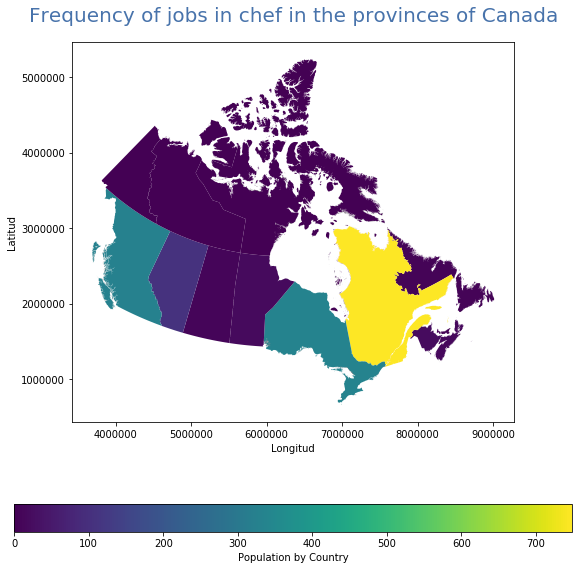

In [76]:
# Size display
fig, ax = plt.subplots(figsize=(10, 10))
 
# Titles and axis
ax.set_title('Frequency of jobs in {} in the provinces of Canada'.format(subject), 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Show map
provinces.plot(column='Frecuency', cmap='viridis', ax=ax, zorder=5, legend=True, 
               legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})

In [17]:
"""m = folium.Map(location=[58, -102], zoom_start=3)

folium.Choropleth(
    geo_data=provinces,
    name='choropleth',
    data=provinces,
    columns=['prefix', 'Frecuency'],
    key_on='feature.properties.prefix',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='junior data analyst job offering'
).add_to(m)

folium.LayerControl().add_to(m)"""

"m = folium.Map(location=[58, -102], zoom_start=3)\n\nfolium.Choropleth(\n    geo_data=provinces,\n    name='choropleth',\n    data=provinces,\n    columns=['prefix', 'Frecuency'],\n    key_on='feature.properties.prefix',\n    fill_color='YlOrRd',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='junior data analyst job offering'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)"

In [18]:
"m"

'm'